etude2

(a)

(b)

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.special import loggamma
from scipy.stats import t

In [157]:
n = 900
d = 30
n_iter = 1000
m_list = [1, 2, 4, 8, 16]
alpha = 0.1

In [175]:
def Bonferroni(p_vals, alpha=0.1, true_nulls=np.arange(10,30)):
    FDP = len(np.intersect1d(np.where(p_vals <= alpha / len(p_vals))[0], true_nulls)) / np.maximum(true_nulls.shape[0], 1)
    num_rejected = np.sum(p_vals <= alpha / len(p_vals))
    return FDP, num_rejected

def BenjaminiYekutieli(p_vals, alpha=0.1, true_nulls=np.arange(10,30)):
    N = len(p_vals)
    c_N = np.log(N) + 1 / (2 * N) + 0.5772156649
    sorted_indices = np.argsort(p_vals)
    test_stat = np.where(np.sort(p_vals) <= np.arange(1, N+1) * alpha / (c_N * N))[0]
    k = -1 if not len(test_stat) else test_stat[-1]
    rejected = sorted_indices[:k+1]
    FDP = len(np.intersect1d(rejected, true_nulls)) / np.maximum(true_nulls.shape[0], 1)
    num_rejected = rejected.shape[0]
    return FDP, num_rejected

#TODO
#def e_value(e_vals, )

def experiment():
    X = np.random.randn(n, d)
    beta = np.zeros(d)
    beta[:10] = np.random.randn(10) * 0.1
    Y = X @ beta + np.random.randn(n)
    beta_hat = np.linalg.solve(X.T @ X, X.T @ Y)
    eps_hat = Y - X @ beta_hat
    T_stats = beta_hat / (np.linalg.norm(eps_hat, 2) * np.sqrt(1 / (n - d) * np.diag(np.linalg.inv(X.T @ X))))
    p_vals = t.cdf(-np.abs(T_stats), df=n-d) * 2
    #e_vals = T_stats**(2*m)
    return Bonferroni(p_vals) + BenjaminiYekutieli(p_vals)

In [176]:
result = []
for _ in range(n_iter): 
    result.append(list(experiment()))
result = np.array(result)

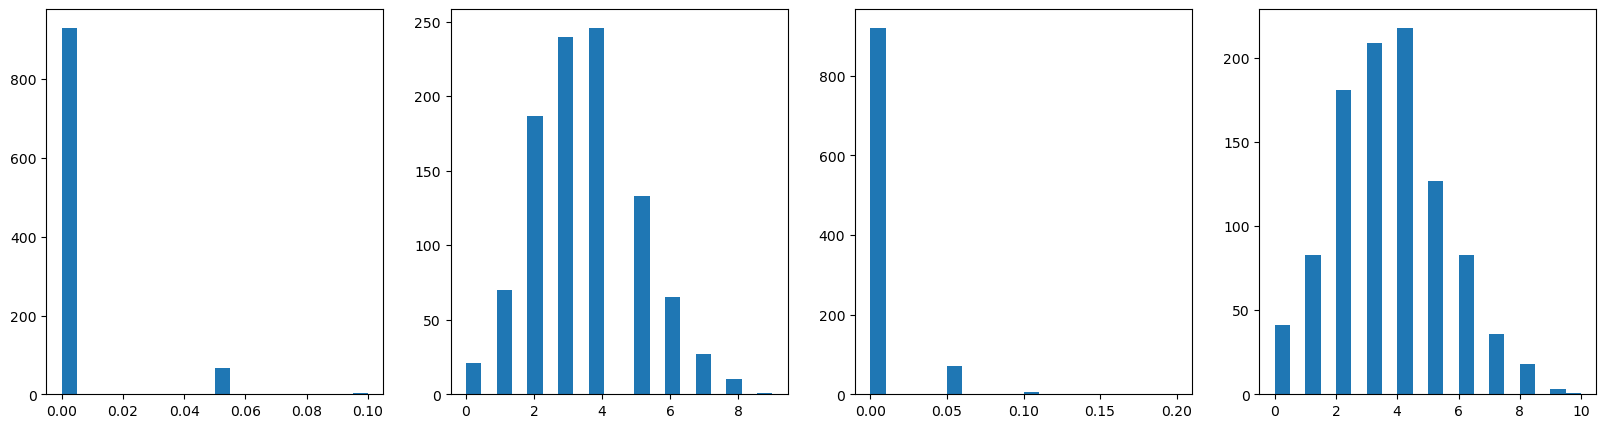

In [177]:
fig, axs = plt.subplots(1,4, figsize=(20,5))
axs[0].hist(result[:,0], bins=20)
axs[1].hist(result[:,1], bins=20)
axs[2].hist(result[:,2], bins=20)
axs[3].hist(result[:,3], bins=20)
plt.show()